In [1]:
#Lectura de datos
import pandas as pd


dat_food=pd.read_csv("C:\\Users\\luisd\\OneDrive\\Escritorio\\Tesis\\Revisión outliers\\1.-Global food prices\\wfp_market_food_prices.csv",encoding="latin1")
real_nam={"adm0_id": "country_id",
"adm0_name": "country_name",
"adm1_id": "locality_id",
"adm1_name": "locality_name",
"mkt_id": "market_id",
"mkt_name": "market_name",
"cm_id": "commodity_purchase_id",
"cm_name": "commodity_purchased",
"cur_id": "currency_id",
"cur_name": "name_of_currency",
"pt_id": "market_type_id",
"pt_name": "market_type",
"um_id": "measurement_id",
"um_name": "unit_of_goods_measurement",
"mp_month": "month_recorded",
"mp_year": "year_recorded",
"*mp_price": "price_paid",
"mp_commoditysource": "Source_supplying_price_information"}
dat_food.rename(real_nam,axis=1,inplace=True)


In [175]:
dat_food.head()

,country_id,country_name,locality_id,locality_name,market_id,market_name,commodity_purchase_id,commodity_purchased,currency_id,name_of_currency,market_type_id,market_type,measurement_id,unit_of_goods_measurement,month_recorded,year_recorded,mp_price,Source_supplying_price_information
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,1,2014,50.0,WFP
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,2,2014,50.0,WFP
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,3,2014,50.0,WFP
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,4,2014,50.0,WFP
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,5,2014,50.0,WFP


Single .csv with >740k rows. Data includes country, locality, market, goods purchased, price & currency used, quantity exchanged, and month/year of purchase.

adm0_id: country id
adm0_name: country name
adm1_id: locality id
adm1_name: locality name
mkt_id: market id
mkt_name: market name
cm_id: commodity purchase id
cm_name: commodity purchased
cur_id: currency id
cur_name: name of currency
pt_id: market type id
pt_name: market type (Retail/Wholesale/Producer/Farm Gate)
um_id: measurement id
um_name: unit of goods measurement
mp_month: month recorded
mp_year: year recorded
*mp_price: price paid
mp_commoditysource: Source supplying price information

In [2]:
#Revisión de algunas preguntas
rows=dat_food.shape[0]
print("Los datos tienen "+str(dat_food.shape[0])+" muestras y tienen "+str(dat_food.shape[1])+" columnas")
print("La unica columna que tiene nulos es localidad, la cual tiene "+str(dat_food.isnull().sum().sum()))
print("El número de productos unicos es "+str(len(dat_food.commodity_purchase_id.unique())))
print("El número de monedas unicas es "+str(len(dat_food.name_of_currency.unique())))
print("El porcentaje de productos comprados en unidad de peso es "+format(dat_food[dat_food.unit_of_goods_measurement.str.contains("(?<=\s)?KG(?=\s)?|(?<=\s)G(?=\s)?")].shape[0]/rows,".2%"))
print("Los datos fueron tomados desde "+str(dat_food.year_recorded.min())+" hasta "+str(dat_food.year_recorded.max()))
print("El porcentaje de datos tomados despues del 2000 es "+format(dat_food[dat_food.year_recorded>1999].shape[0]/rows,".2%"))

dat_food.unit_of_goods_measurement.value_counts()[:20]

Los datos tienen 743914 muestras y tienen 18 columnas
La unica columna que tiene nulos es localidad, la cual tiene 13949
El número de productos unicos es 321
El número de monedas unicas es 61
El porcentaje de productos comprados en unidad de peso es 86.34%
Los datos fueron tomados desde 1992 hasta 2017
El porcentaje de datos tomados despues del 2000 es 98.91%


unit_of_goods_measurement
KG         562172
L           45709
500 G       21828
100 KG      17908
Unit        17271
45 KG        6782
90 KG        6680
50 KG        5499
Day          5137
Marmite      4549
3.5 KG       3800
Gallon       3207
Loaf         2919
10 pcs       2853
3 KG         2792
1.5 KG       2760
Sack         2759
USD/LCU      2306
Pound        2100
12.5 KG      1687
Name: count, dtype: int64

<AxesSubplot:xlabel='year_recorded'>

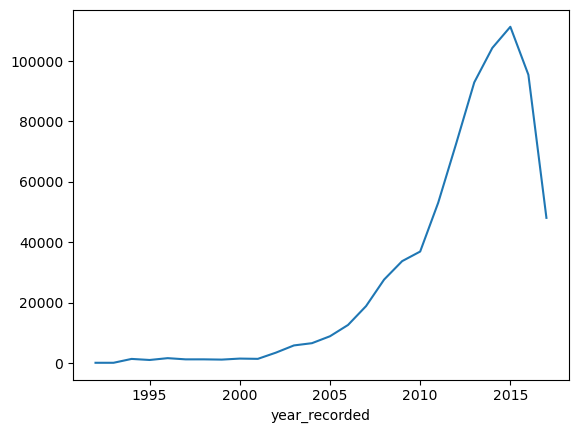

In [98]:
#"Verificar la distribución de fechas"
dat_food["year_recorded"].value_counts().sort_index(ascending=False).plot()


In [3]:
#Aquí solo se toman los registros que son kg o g, ya que existen productos que son tanto pesados en kilos como en litros

mes_aux=dat_food[dat_food.unit_of_goods_measurement.str.contains("(?<=\s)?KG(?=\s)?")].unit_of_goods_measurement.unique()#|(?<=\s)?KG(?=\s)?
kg_dat=pd.concat([pd.DataFrame(mes_aux),1/pd.DataFrame(mes_aux)[0].str.extract("(\d+\.?\d{0,100})").fillna(1).rename({0:"cambios"},axis=1).astype(float)],axis=1)

mes_aux=dat_food[dat_food.unit_of_goods_measurement.str.contains("(?<=\s)G(?=\s)?")].unit_of_goods_measurement.unique()#|(?<=\s)?KG(?=\s)?
gr_dat=pd.concat([pd.DataFrame(mes_aux),1000/pd.DataFrame(mes_aux)[0].str.extract("(\d+\.?\d{0,100})").fillna(1).rename({0:"cambios"},axis=1).astype(float)],axis=1)
dat_fin=pd.concat([kg_dat,gr_dat]).rename({0:"unit_of_goods_measurement"},axis=1)
dat_fin
dat_food=dat_food.merge(dat_fin,how="left",on="unit_of_goods_measurement").dropna()

#Se pudierón conseguir datos historicos de el cambio de moneda despues de los 2000, y no se pudierón conseguir de las modenas NIS ni de somaliland Shilling, por eso se realiza en siguiente filtro

dat_food=dat_food[(dat_food["year_recorded"]>1999) & (~dat_food["name_of_currency"].isin(['Somaliland Shilling', 'NIS']))]
dat_food=dat_food.reset_index(drop=True)
print("El tamaño final del dataframe es "+str(dat_food.shape[0])+" muestras")


El tamaño final del dataframe es 619628 muestras


<AxesSubplot:>

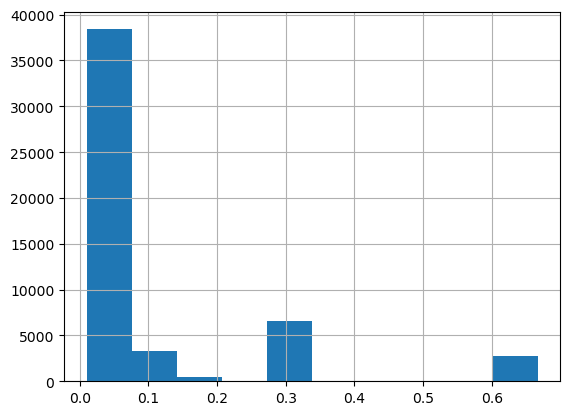

In [41]:
#ver que tantas transformaciones se tendran que hacer con respecto al peso
dat_food[dat_food.cambios<1]["cambios"].hist()

15.428571428571429


<Axes: xlabel='year_recorded'>

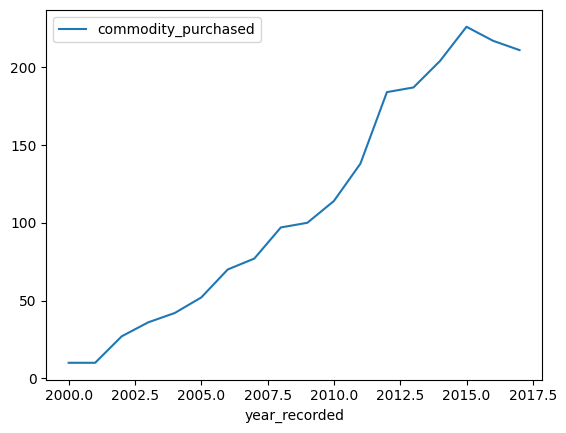

In [4]:
#El número de productos recolectados fue creciendo con el tiempo
zi=dat_food[["year_recorded","commodity_purchased"]].drop_duplicates().groupby("year_recorded").agg({"commodity_purchased":"count"})
zii=zi["commodity_purchased"].shift(-1)-zi["commodity_purchased"]
print(zii[zii>0].mean())
zi.plot()

array([[<Axes: title={'center': 'commodity_purchased_by_Y'}>]],
      dtype=object)

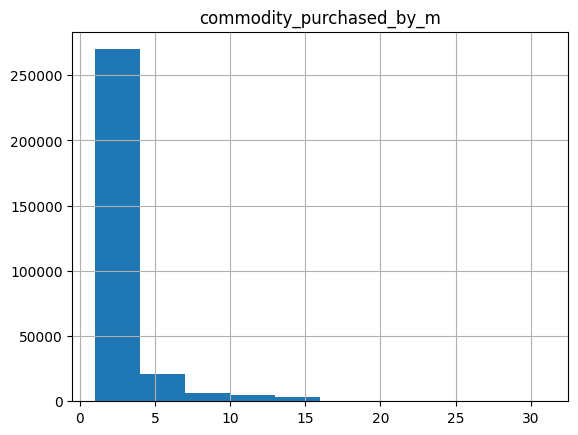

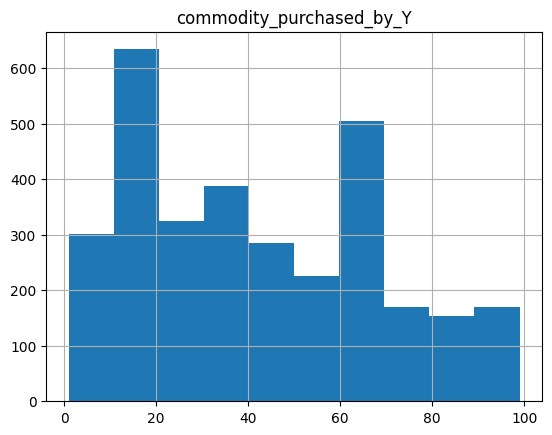

In [5]:
#verificar la cantidad de productos vendida por mes y año
z=dat_food.groupby(["year_recorded","month_recorded","country_name","locality_name","commodity_purchased"]).agg({"market_type_id":"count"}).rename({"market_type_id":"commodity_purchased_by_m"},axis=1)#"commodity_purchased"]).agg({"market_type":"count"})
z.hist()#
z1=dat_food.groupby(["year_recorded","country_name","commodity_purchased"]).agg({"market_type_id":"count"}).rename({"market_type_id":"commodity_purchased_by_Y"},axis=1)#"commodity_purchased"]).agg({"market_type":"count"})
z1[z1["commodity_purchased_by_Y"]<100].hist()
#"market_type_id"

In [167]:
#Se realiza un request de los distintos cambios de modena a dolar
#https://openexchangerates.org/login?account_deleted
#https://docs.openexchangerates.org/reference/api-introduction


# import requests

# import numpy as np
# months=[]
# for i in np.arange(1,13):
#     if i<10:
#         months.append("0"+str(i))
#     else:
#         months.append(str(i))
# months  
# final_dat_exc={}
# for y in dat_food[dat_food["year_recorded"]>1999]["year_recorded"].unique():
#     #final_dat_exc[str(y)]={}
#     for m in months:
#         try:
#             r = requests.get('https://openexchangerates.org/api/historical/{year}-{month}-01.json?app_id=[insertarappid]&base=USD'.format(year=y,month=m),timeout=3)
#             final_dat_exc[str(y)][m]=r.json()["rates"]
#         except:
#             print("error:"+str(y)+m)

# # with open('curr_hist.yml', 'w') as yaml_file:
# #     yaml.dump(final_dat_exc, yaml_file, default_flow_style=False)            
# # 
# # with open('curr_hist.yml', 'w') as yaml_file:
# #     yaml.dump(final_dat_exc, yaml_file, default_flow_style=False)  

####Se le da un trata miento final a los datos para guardarse 
# final_curr=pd.DataFrame([])
# for y in dat_food[dat_food["year_recorded"]>1999]["year_recorded"].unique():
    
#     for m in months:

#         z=pd.DataFrame(final_dat_exc[str(y)]).T
#         z=z.fillna(z.mean()).reset_index().rename({"index":"month"},axis=1)
#         z["year"]=str(y)
#         final_curr=pd.concat([final_curr,z])      

# final_curr.fillna(method='ffill').fillna(method="bfill")
# final_curr=final_curr.fillna(method='ffill').fillna(method="bfill")#
# final_curr.to_csv("currency_hist.csv")

In [6]:
#datos para tomar en cuenta el cambio de divisa
final_curr=pd.read_csv("currency_hist.csv")
final_curr=final_curr.drop(["month","Unnamed: 0"],axis=1).drop_duplicates().groupby("year").agg("mean").reset_index()
final_curr["USD"]=1
final_curr
final_curr=final_curr.melt(id_vars=["year"], 
        var_name="curr", 
        value_name="curr_trans")
final_curr




,year,curr,curr_trans
0,2000,AED,3.672376
1,2001,AED,3.672477
2,2002,AED,3.672477
3,2003,AED,3.672482
4,2004,AED,3.672606
...,...,...,...
3253,2013,GRD,330.021307
3254,2014,GRD,330.021307
3255,2015,GRD,330.021307
3256,2016,GRD,330.021307


In [7]:
#transformación de datos
dat_food["curr_trans_fin"]=dat_food.merge(final_curr,how="left",left_on=["year_recorded","name_of_currency"],right_on=["year","curr"])["curr_trans"]
dat_food["mp_price_dolar"]=(dat_food["mp_price"]/dat_food["curr_trans_fin"])*dat_food["cambios"]#.isnull().sum()
dat_food.groupby(["year_recorded","country_name","commodity_purchased"],as_index=False).agg({"market_name":"count"}).sort_values("market_name",ascending=False)

,year_recorded,country_name,commodity_purchased,market_name
4156,2016,Mali,Millet,821
1039,2009,Niger,Millet,799
1040,2009,Niger,Rice (imported),791
4160,2016,Mali,Sorghum,785
3807,2015,Zambia,Beans (dry),779
...,...,...,...,...
4821,2017,Timor-Leste,Rice (local),1
4477,2017,Cote d'Ivoire,Cotton,1
3359,2015,Colombia,Pasta,1
361,2006,Colombia,Coffee (instant),1


In [8]:
#distintas funciones para encontrar valores atípicos
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
import math


def grubbs_test(x):
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    
    if (g_critical > g_calculated) or (sd_x<0.1):
        return 0
        #Accept null hypothesis and conclude that there is no outliers\n")
    else:
        return 1
        #Reject null hypothesis and conclude that there is an outliers\n")

def Winsorization_outliers(df):
    outs=[]
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in df:
        if i > q3 or i < q1:
            outs.append(1)
        else:
            outs.append(0)    
    return out

def Zscore_outlier(df):

    df=np.sort(df)
    # p1 = np.percentile(df, 1)
    # p99 = np.percentile(df, 99)
    # # # Filtra el array para obtener los valores entre los percentiles 1 y 99
    # df1 = df[(df > p1) & (df < p99)]
    index_5_percent = math.ceil((0.05 * len(df)))
    df1= df[index_5_percent:-index_5_percent]
    out=[]
    m = np.mean(df1)
    sd = np.std(df1)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append((1,z,abs(z)))
        else:
            out.append((0,z,abs(z)))
    return out
    
def ZRscore_outlier(df):
    outs=[]
    med = np.median(df)
    ma = stats.median_abs_deviation(df)
    print(ma)
    for i in df: 
        z = (0.6745*(i-med))/ (np.median(ma))
        if np.abs(z) > 3:
            outs.append((1,z,abs(z)))
        else:
            outs.append((0,z,abs(z)))     
            
    return outs        
    
def iqr_outliers(df):
    outs=[]
    q1 = np.quantile(df,0.25)
    q3 = np.quantile(df,0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            outs.append(1)
        else:
            outs.append(0)   
    # print(outs)         
    return outs
    


def DB_outliers(df):
    if np.std(df)>0:
        e=np.std(df)
    else:
        e=1    

    outlier_detection = DBSCAN(eps = e , metric='euclidean', min_samples = 3)
    clusters = outlier_detection.fit_predict(pd.DataFrame(df))
    return list(clusters)

def Iso_outliers(df):
    df=pd.DataFrame(df)
    iso = IsolationForest(random_state = 1, contamination= 'auto')
    iso.fit(df)
    return list(zip(iso.predict(df),iso.decision_function(df)))
    

In [9]:
#aplicar las pruebas
dat_proof=dat_food.groupby(["year_recorded","country_name","commodity_purchased"],as_index=False).agg({"market_name":"count"}).sort_values("market_name",ascending=False)
dat_proof=dat_proof[dat_proof["market_name"]>9].reset_index(drop=True)

proof_fin=[]
for ind in dat_proof.index:
    year,coun,comm=dat_proof["year_recorded"][ind],dat_proof["country_name"][ind],dat_proof["commodity_purchased"][ind]
    x=np.array(dat_food[ (dat_food["year_recorded"]==year) & (dat_food["country_name"]==coun) & (dat_food["commodity_purchased"]==comm)]["mp_price_dolar"])
    
    proof_fin.append(grubbs_test(x))
    if ind % 500 == 0:
        print("Se han escaneado : " + str(ind))

Se han escaneado : 0
Se han escaneado : 500
Se han escaneado : 1000
Se han escaneado : 1500
Se han escaneado : 2000
Se han escaneado : 2500
Se han escaneado : 3000
Se han escaneado : 3500
Se han escaneado : 4000


C:\Users\luisd\AppData\Local\Temp\ipykernel_28232\2655535088.py:15: RuntimeWarning: invalid value encountered in scalar divide
  g_calculated = numerator/sd_x


Se han escaneado : 4500


In [11]:
dat_proof["out"]=proof_fin
dat_food_out=dat_food.merge(dat_proof.drop("market_name",axis=1),how="left",on=["year_recorded","country_name","commodity_purchased"])
dat_food_out=dat_food_out[dat_food_out["out"]==1].sort_values(["year_recorded","country_name","commodity_purchased","mp_price_dolar"]).reset_index(drop=True)
dat_proof2=dat_food_out.groupby(["year_recorded","country_name","commodity_purchased"],as_index=False).agg({"market_name":"count"}).sort_values(["year_recorded","country_name","commodity_purchased"]).reset_index(drop=True)
out=pd.DataFrame([])
coln=[["out_z","z_score","z_score_abs"],["out_iqr"],["out_db"],["out_iso","iso_score"]]#("out_zr","z_scorer","z_score_absr")]#,["out_win"]#,Winsorization_outliers
det_out=dict(zip([Zscore_outlier,iqr_outliers,DB_outliers,Iso_outliers],coln))#ZRscore_outlier,],coln))
for ind in dat_proof2.index:
    
    year,coun,comm=dat_proof2["year_recorded"][ind],dat_proof2["country_name"][ind],dat_proof2["commodity_purchased"][ind]
    # print(year,coun,comm)
    x=np.array(dat_food_out[ (dat_food_out["year_recorded"]==year) & (dat_food_out["country_name"]==coun) & (dat_food_out["commodity_purchased"]==comm)]["mp_price_dolar"])
    out_aux=pd.DataFrame([])
    count=1
    for func in det_out.keys():
        
        # print(out_aux)
        # print(x)
        out_aux=pd.concat([out_aux,pd.DataFrame(func(x),columns=det_out[func])],axis=1)
        count=count+1
        # print(count)
    
    out=pd.concat([out,out_aux])
    if ind % 100 == 0:
        print("Avance :" + str(ind) )
    

Avance :0


C:\Users\luisd\AppData\Local\Temp\ipykernel_28232\2655535088.py:50: RuntimeWarning: invalid value encountered in scalar divide
  z = (i-m)/sd
C:\Users\luisd\AppData\Local\Temp\ipykernel_28232\2655535088.py:50: RuntimeWarning: divide by zero encountered in scalar divide
  z = (i-m)/sd


Avance :100


C:\Users\luisd\AppData\Local\Temp\ipykernel_28232\2655535088.py:50: RuntimeWarning: divide by zero encountered in scalar divide
  z = (i-m)/sd
C:\Users\luisd\AppData\Local\Temp\ipykernel_28232\2655535088.py:50: RuntimeWarning: invalid value encountered in scalar divide
  z = (i-m)/sd


Avance :200
Avance :300
Avance :400
Avance :500


C:\Users\luisd\AppData\Local\Temp\ipykernel_28232\2655535088.py:50: RuntimeWarning: divide by zero encountered in scalar divide
  z = (i-m)/sd
C:\Users\luisd\AppData\Local\Temp\ipykernel_28232\2655535088.py:50: RuntimeWarning: invalid value encountered in scalar divide
  z = (i-m)/sd


Avance :600
Avance :700


In [132]:
#encontrar los productos y paises más atipicos
dat_food_out
out[out["z_score"]==-np.inf]
out1=pd.concat([dat_food_out,out.reset_index(drop=True)],axis=1)
out1.sort_values("iso_score")#.year_recorded
dat_outf=out1[(out1["out_z"]==1) & (out1["out_iqr"]==1) & (out1["out_iso"]==-1) & (out1["out_db"]==-1)]#.value_counts("name_of_currency")#.sort_values("mp_price_dolar")# & (out1["name_of_currency"]=="SYP")
dat_outf.value_counts("name_of_currency")[:15], dat_outf.value_counts("commodity_purchased")[:15], dat_outf.value_counts("country_name")[:15], dat_outf.value_counts("year_recorded")
d_norm=dat_food.groupby("commodity_purchased",as_index=False).agg({"mp_price_dolar":["mean"]})
d_co=dat_outf.groupby("commodity_purchased",as_index=False).agg({"mp_price_dolar":["mean","max"]})
d_co[d_co["commodity_purchased"].isin(dat_outf.value_counts("commodity_purchased")[:15].index)].merge(d_norm,how="left",on="commodity_purchased")

d_norm=dat_food[dat_food["commodity_purchased"].isin(dat_outf.value_counts("commodity_purchased").index)].groupby(["country_name","name_of_currency"],as_index=False).agg({"mp_price_dolar":["mean"]})
d_co=dat_outf.groupby(["country_name","name_of_currency"],as_index=False).agg({"mp_price_dolar":["mean","max"]})
d_co[d_co["country_name"].isin(dat_outf.value_counts("country_name")[:15].index)].merge(d_norm,how="left",on=["country_name","name_of_currency"])



C:\Users\luisd\AppData\Local\Temp\ipykernel_14988\765625359.py:9: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  d_co[d_co["commodity_purchased"].isin(dat_outf.value_counts("commodity_purchased")[:15].index)].merge(d_norm,how="left",on="commodity_purchased")
C:\Users\luisd\AppData\Local\Temp\ipykernel_14988\765625359.py:13: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  d_co[d_co["country_name"].isin(dat_outf.value_counts("country_name")[:15].index)].merge(d_norm,how="left",on=["country_name","name_of_currency"])


country_name name_of_currency mp_price_dolar_x  \
                                                                  mean   
0                            Armenia              AMD         3.584611   
1                           Colombia              COP         4.405977   
2   Democratic Republic of the Congo              CDF         5.034805   
3                             Gambia              GMD         3.165627   
4                             Guinea              GNF         2.398739   
5                             Jordan              JOD      1149.736210   
6   Lao People's Democratic Republic              LAK         4.593074   
7                            Lebanon              LBP         5.844430   
8                         Mozambique              MZN         2.499423   
9                            Myanmar              MMK       178.990231   
10                       Philippines              PHP         2.930446   
11                            Rwanda              RWF         3.378101   
12              Syrian Arab Republic              SYP        22.992486   
13                        Tajikistan              TJS         1.740392   
14                             Yemen              YER         2.499527   

                 mp_price_dolar_y  
             max             mean  
0       9.745263         2.253522  
1      34.396746         1.865292  
2      26.421253         2.809086  
3      23.889572         0.847601  
4       4.562493         1.087080  
5   13546.292982        29.375928  
6       8.002512         2.919776  
7      18.366853         3.081615  
8       5.332969         0.890441  
9     487.903902        48.423049  
10      4.380542         2.021649  
11     58.401062         0.812067  
12    161.135808         3.378623  
13      5.227020         1.339759  
14      5.768655         1.133973

In [ ]:
var="commodity_purchased"
dat_outf[dat_outf[var].isin(dat_outf.value_counts(var)[:15].index)].sort_values([var,"mp_price_dolar"],ascending=False).groupby([var], sort=False).head(3).head(50)
var="country_name"
dat_outf[dat_outf[var].isin(dat_outf.value_counts(var)[:15].index)].sort_values([var,"mp_price_dolar"],ascending=False).groupby([var], sort=False).head(3).head(50)
var="year_recorded"
dat_outf[dat_outf[var].isin(dat_outf.value_counts(var)[:15].index)].sort_values([var,"mp_price_dolar"],ascending=False).groupby([var], sort=False).head(3).head(50)
var="name_of_currency"
dat_outf[dat_outf[var].isin(dat_outf.value_counts(var)[:15].index)].sort_values([var,"mp_price_dolar"],ascending=False).groupby([var], sort=False).head(3).head(50)


[(1,2),(5,4)]